In [1]:
# Reading Dataset
import numpy as np
import pandas as pd
# Visualization
import plotly.express as px
import plotly.graph_objects as go  # for 3D plot visualization
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

from wordcloud import WordCloud
from langdetect import detect
from datetime import datetime

In [2]:
animes = pd.read_csv("anime-dataset-2023.csv")

In [3]:
print("Shape of the Dataset:", animes.shape)

Shape of the Dataset: (24905, 24)


In [23]:
# Count the number of anime titles by type
type_counts = animes['Type'].value_counts()
type_counts

TV         7597
Movie      4381
OVA        4076
ONA        3533
Music      2686
Special    2558
UNKNOWN      74
Name: Type, dtype: int64

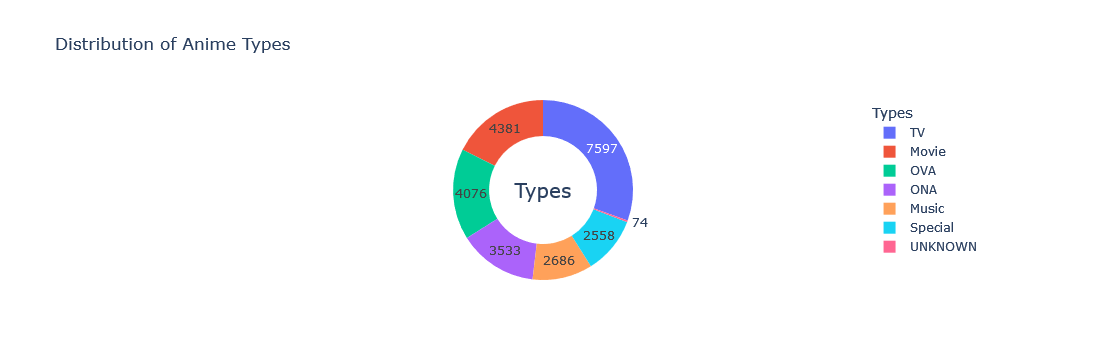

In [30]:
# Count the number of anime titles by type
type_counts = animes['Type'].value_counts()



# Create the plotly figure
fig = go.Figure(data=[go.Pie(labels=type_counts.index, values=type_counts.values,
                             hole=0.6, hoverinfo='label+percent', textinfo='value')])

fig.update_layout(title='Distribution of Anime Types',
                  legend=dict(font=dict(size=12), title='Types'),
                  annotations=[dict(text='Types', x=0.5, y=0.5, font_size=20, showarrow=False)])

fig.show()

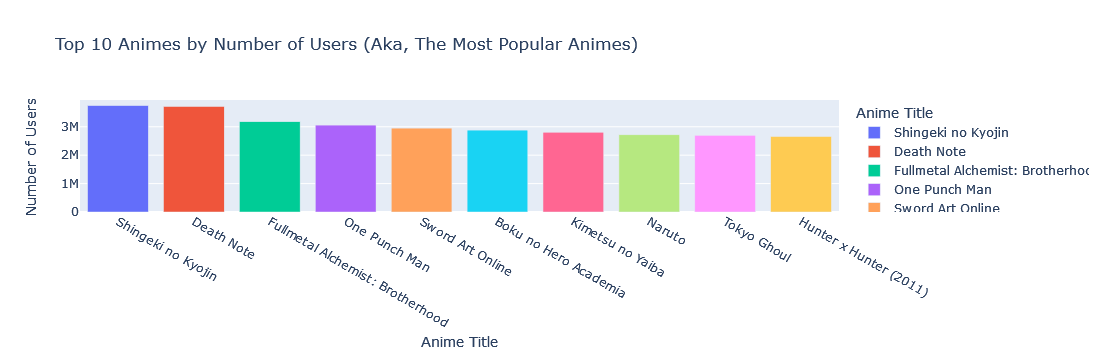

In [48]:
# Sort the dataframe by the number of users who have scored the anime
top_10_scored = animes.sort_values(by='Members', ascending=False).head(10)

# Create a bar chart
fig = px.bar(top_10_scored, x='Name', y='Members', labels={'Members':'Number of Users', 'Name':'Anime Title'},color='Name',
             title='Top 10 Animes by Number of Users (Aka, The Most Popular Animes)')

#Because the animes popularity is connected to the number of users that watch it, this top ten list is pretty accurate
fig.show()

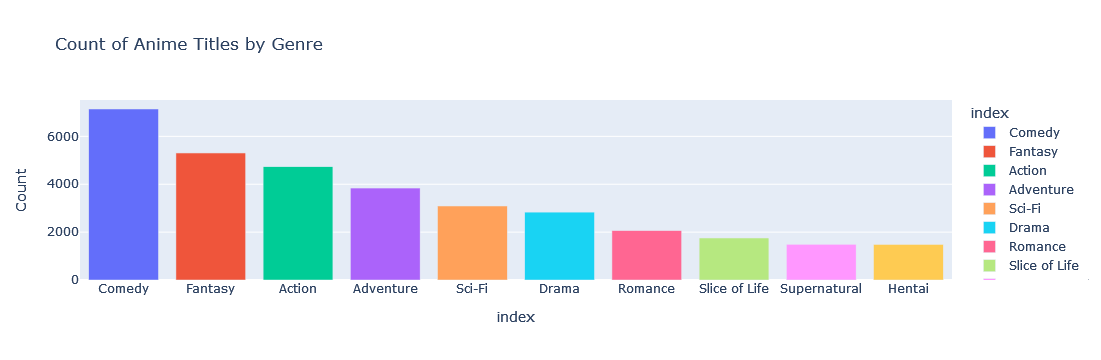

In [54]:

# Split the genres and count their occurrences
genre_counts = animes[animes['Genres'] != "UNKNOWN"]['Genres'].apply(lambda x: x.split(', ')).explode().value_counts().head(10)

# Create a bar chart
fig = px.bar(genre_counts, x=genre_counts.index, y=genre_counts.values,
             labels={'x':'Genre', 'y':'Count'},
             title='Count of Anime Titles by Genre',
             color=genre_counts.index)

fig.show()




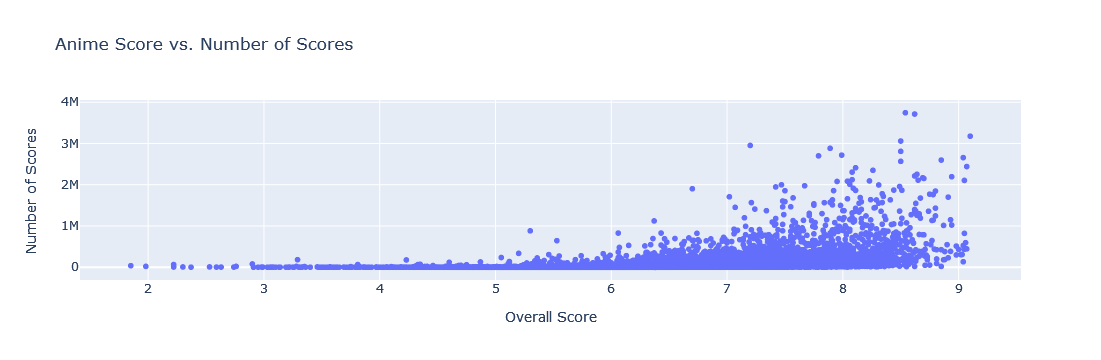

In [56]:
# Create a scatter plot
fig = px.scatter(animes, x='Score', y='Members', 
                 labels={'Score':'Overall Score', 'Members':'Number of Scores'}, 
                 title='Anime Score vs. Number of Scores')

fig.show()

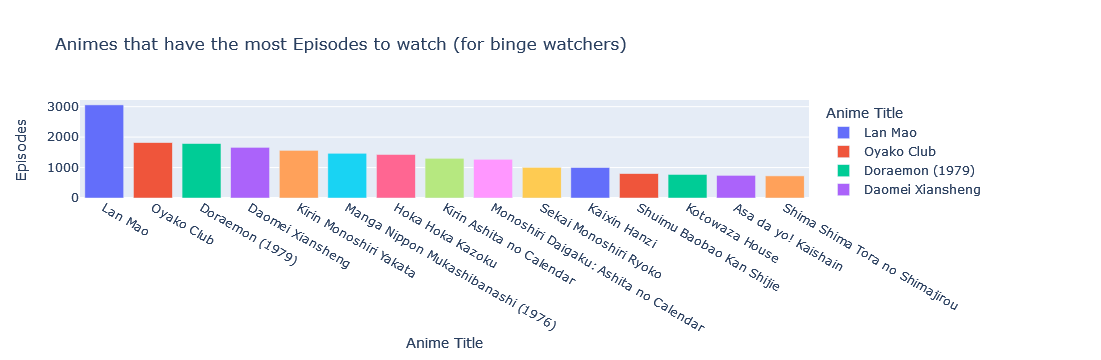

In [85]:
animes['Episodes'] = animes['Episodes'].replace('UNKNOWN', 0)
animes['Episodes'] = animes['Episodes'].astype('int')

# Split the genres and count their occurrences
animes_to_binge = animes.sort_values(by='Episodes', ascending=False).head(15)

# Create a bar chart
fig = px.bar(animes_to_binge, x='Name', y='Episodes', labels={'Members':'Number of Users', 'Name':'Anime Title'},color='Name',
             title='Animes that have the most Episodes to watch (for binge watchers)')

#Because the animes popularity is connected to the number of users that watch it, this top ten list is pretty accurate
fig.show()